In [27]:
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
# loading the data into the dataframe
# df = pd.read_csv('data.csv') 
df = pd.read_csv("HT_Sensor_UCI_Dataset\\HT_Sensor_dataset22.csv")
print(df) 

    id      time       R1       R2       R3       R4       R5       R6  \
0    0 -0.999750  12.8621  10.3683  10.4383  11.6699  13.4931  13.3423   
1    0 -0.999472  12.8617  10.3682  10.4375  11.6697  13.4927  13.3412   
2    0 -0.999194  12.8607  10.3686  10.4370  11.6696  13.4924  13.3405   
3    0 -0.998916  12.8602  10.3686  10.4370  11.6697  13.4921  13.3398   
4    0 -0.998627  12.8595  10.3688  10.4374  11.6699  13.4919  13.3390   
..  ..       ...      ...      ...      ...      ...      ...      ...   
86   0 -0.937949  12.9847  10.5615  10.6346  11.8949  13.7823  13.4975   
87   0 -0.937671  12.9848  10.5612  10.6347  11.8951  13.7828  13.4982   
88   0 -0.937393  12.9849  10.5614  10.6347  11.8955  13.7832  13.4983   
89   0 -0.937104  12.9848  10.5615  10.6346  11.8954  13.7838  13.4987   
90   0 -0.936826  12.9849  10.5619  10.6342  11.8956  13.7841  13.4990   

         R7       R8    Temp.  Humidity  
0   8.04169  8.73901  26.2257   59.0528  
1   8.04133  8.73908  26.23

In [6]:
# viewing info about the columns
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        91 non-null     int64  
 1   time      91 non-null     float64
 2   R1        91 non-null     float64
 3   R2        91 non-null     float64
 4   R3        91 non-null     float64
 5   R4        91 non-null     float64
 6   R5        91 non-null     float64
 7   R6        91 non-null     float64
 8   R7        91 non-null     float64
 9   R8        91 non-null     float64
 10  Temp.     91 non-null     float64
 11  Humidity  91 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 8.7 KB


In [7]:
#viewing few rows from the top
df.head()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [8]:
#number of rows and columns in the dataset
print(df.shape)

(91, 12)


In [9]:
#statistical information about columns
print(df.describe())

         id       time         R1         R2         R3         R4         R5  \
count  91.0  91.000000  91.000000  91.000000  91.000000  91.000000  91.000000   
mean    0.0  -0.960185  12.934218  10.486989  10.558570  11.806690  13.669655   
std     0.0   0.023356   0.053949   0.081011   0.084548   0.094388   0.122394   
min     0.0  -0.999750  12.853700  10.368200  10.435300  11.669200  13.491100   
25%     0.0  -0.993452  12.861200  10.370250  10.437700  11.670650  13.493500   
50%     0.0  -0.949417  12.965400  10.535200  10.608100  11.860600  13.740500   
75%     0.0  -0.943135  12.981300  10.555800  10.631950  11.887600  13.773500   
max     0.0  -0.936826  12.984900  10.561900  10.634700  11.895600  13.784100   

              R6         R7         R8      Temp.   Humidity  
count  91.000000  91.000000  91.000000  91.000000  91.000000  
mean   13.432662   8.057417   8.769499  26.185699  58.939865  
std     0.067101   0.012149   0.020408   0.053750   0.047109  
min    13.333900  

In [10]:
#checking how many null values are in each column
df.isnull().sum()

id          0
time        0
R1          0
R2          0
R3          0
R4          0
R5          0
R6          0
R7          0
R8          0
Temp.       0
Humidity    0
dtype: int64

In [11]:
# dropping all the rows with NaN values
df = df.dropna()

In [13]:
#defining training and testing data
x_train = df[:70]
y_train = x_train['R1']
x_test = df[70:91]
y_test = x_test['R1']
print(y_test)

70    12.9823
71    12.9826
72    12.9829
73    12.9832
74    12.9835
75    12.9837
76    12.9839
77    12.9832
78    12.9835
79    12.9837
80    12.9839
81    12.9841
82    12.9843
83    12.9842
84    12.9844
85    12.9845
86    12.9847
87    12.9848
88    12.9849
89    12.9848
90    12.9849
Name: R1, dtype: float64


In [14]:
df.loc[70:91].count() / df.shape[0] * 100

id          23.076923
time        23.076923
R1          23.076923
R2          23.076923
R3          23.076923
R4          23.076923
R5          23.076923
R6          23.076923
R7          23.076923
R8          23.076923
Temp.       23.076923
Humidity    23.076923
dtype: float64

In [15]:
#Normalizing training data
train_norm = x_train['R1']

#converted into array as all the methods available are for arrays and not lists
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

#Scaling all values between 0 and 1 so that large values don't just dominate
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.06552262]
[0.0624025]
[0.05460218]
[0.05070203]
[0.04524181]


In [16]:
# Even after normalization and scaing, null values are possible 
# (many people disregard this). Let's check if any null values are present.
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  1


In [17]:
#removing null values 
train_norm = train_norm[train_norm!=0]

In [19]:
#Normalizing testing data and repeating the same process as done for training data
test_norm = x_test['R1']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.]
[0.11538462]
[0.23076923]
[0.34615385]
[0.46153846]


In [20]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1 
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  1


In [21]:
#removing null values
test_norm = test_norm[test_norm != 0]

In [22]:
print(train_norm.shape)
print(test_norm.shape)

(69,)
(20,)


In [23]:
#since everything on the sensor array data is okay, let us now train the entire data set
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [24]:
n_steps = 3
X_split_train, y_split_train = split_sequence(train_norm, n_steps)
#for i in range(len(X_split_train)):
    #print(X_split_train[i], y_split_train[i])
n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train)

[[[0.06552262]
  [0.0624025 ]
  [0.05460218]]

 [[0.0624025 ]
  [0.05460218]
  [0.05070203]]

 [[0.05460218]
  [0.05070203]
  [0.04524181]]

 [[0.05070203]
  [0.04524181]
  [0.04446178]]

 [[0.04524181]
  [0.04446178]
  [0.04524181]]

 [[0.04446178]
  [0.04524181]
  [0.03900156]]

 [[0.04524181]
  [0.03900156]
  [0.03276131]]

 [[0.03900156]
  [0.03276131]
  [0.02808112]]

 [[0.03276131]
  [0.02808112]
  [0.024961  ]]

 [[0.02808112]
  [0.024961  ]
  [0.02184087]]

 [[0.024961  ]
  [0.02184087]
  [0.024961  ]]

 [[0.02184087]
  [0.024961  ]
  [0.02028081]]

 [[0.024961  ]
  [0.02028081]
  [0.01638066]]

 [[0.02028081]
  [0.01638066]
  [0.0124805 ]]

 [[0.01638066]
  [0.0124805 ]
  [0.00936037]]

 [[0.0124805 ]
  [0.00936037]
  [0.01014041]]

 [[0.00936037]
  [0.01014041]
  [0.01014041]]

 [[0.01014041]
  [0.01014041]
  [0.00702028]]

 [[0.01014041]
  [0.00702028]
  [0.00468019]]

 [[0.00702028]
  [0.00468019]
  [0.00156006]]

 [[0.00468019]
  [0.00156006]
  [0.00312012]]

 [[0.00156006

In [25]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[0.11538462 0.23076923 0.34615385] 0.46153846153811173
[0.23076923 0.34615385 0.46153846] 0.5384615384618883
[0.34615385 0.46153846 0.53846154] 0.6153846153847553
[0.46153846 0.53846154 0.61538462] 0.3461538461542659
[0.53846154 0.61538462 0.34615385] 0.46153846153811173


In [28]:
# Let's define our neural network (LSTM: Long Short Term Memory). Let's add 50 nodes in our first layer with a ReLU (Rectified linear unit) activation. Their shape will be step size, number of features. Then we will add, a dense layer with one node for the output.
# We can try out different optimizers to see which minimizes loss and maximizes accuracy. Stochastic gradient descent (SGD), Adam, AdaBoost, RMSProp are few of them. lr = learning rate, decay = by how much to decay the learning rate, momentum = how much should the gradient descent be accelerated to dampen oscillations, nesterov = whether to use nesterov momentum. Nesterov has stronger convergence for convex functions. And then we compile using MSE (mean squared loss) as our loss function.
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

#sgd = optimizers.SGD(lr=0.001, decay=1e-5, momentum=1.0, nesterov=False)
sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True) #good

#keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

C:\Users\Eager Beaver\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
3/3 [==============================] - 4s 187ms/step - loss: 0.4773 - accuracy: 0.0000e+00 - val_loss: 0.5501 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 0.4418 - accuracy: 0.0000e+00 - val_loss: 0.5105 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 17ms/step - loss: 0.4095 - accuracy: 0.0000e+00 - val_loss: 0.4738 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 16ms/step - loss: 0.3796 - accuracy: 0.0000e+00 - val_loss: 0.4400 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 18ms/step - loss: 0.3530 - accuracy: 0.0000e+00 - val_loss: 0.4078 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.3254 - accuracy: 0.0000e+00 - val_loss: 0.3778 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 22ms/step - loss: 0.3015 - accuracy: 0.0000e+00 - val_loss: 0.34

In [29]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [30]:
yhat = model.predict(X_split_test)
for i in range(5):
    print(yhat[i])

[0.14356576]
[0.16999394]
[0.1927076]
[0.21225622]
[0.19953355]


In [31]:
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)

MSE: 0.26398


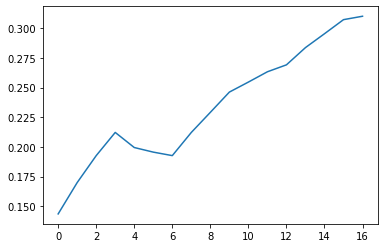

In [32]:
plt.plot(yhat)

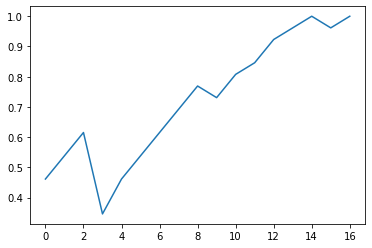

In [33]:
plt.plot(y_split_test)

In [34]:
_, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
_, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.00000, Test: 0.00000


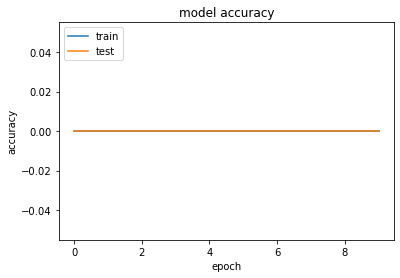

In [35]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

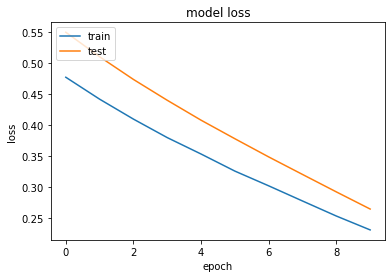

In [36]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
#check concentrations per gas - by specififying the gas
def compute(var):
    train_norm = x_train[var] 
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]
    
    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

    yhat = model.predict(X_split_test)

    mse = mean_squared_error(y_split_test, yhat)
    print(mse)
    
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
3/3 [==============================] - 0s 44ms/step - loss: 0.2072 - accuracy: 0.0000e+00 - val_loss: 0.2371 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 17ms/step - loss: 0.1849 - accuracy: 0.0000e+00 - val_loss: 0.2123 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 23ms/step - loss: 0.1655 - accuracy: 0.0000e+00 - val_loss: 0.1876 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 22ms/step - loss: 0.1455 - accuracy: 0.0000e+00 - val_loss: 0.1640 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 17ms/step - loss: 0.1264 - accuracy: 0.0000e+00 - val_loss: 0.1408 - val_accuracy: 0.0588
Epoch 6/10
3/3 [==============================] - 0s 20ms/step - loss: 0.1080 - accuracy: 0.0152 - val_loss: 0.1184 - val_accuracy: 0.1176
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0900 - accuracy: 0.0152 - val_loss: 0.0967 - val_accuracy

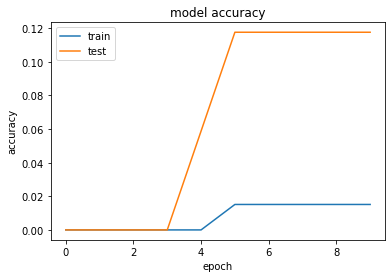

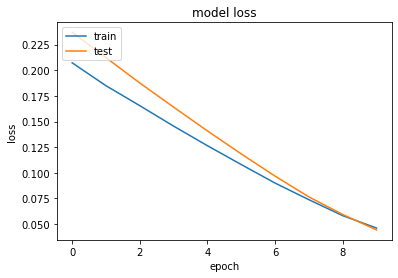

In [38]:
compute('R1')

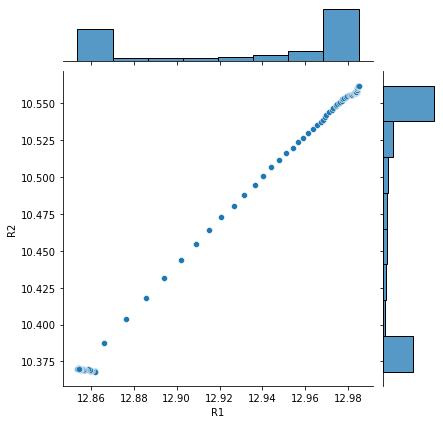

In [39]:
# check whether conentrations are positively correlated with very few outliers.
sns.jointplot(x=df['R1'], y=df['R2'], data = df)

<AxesSubplot:>

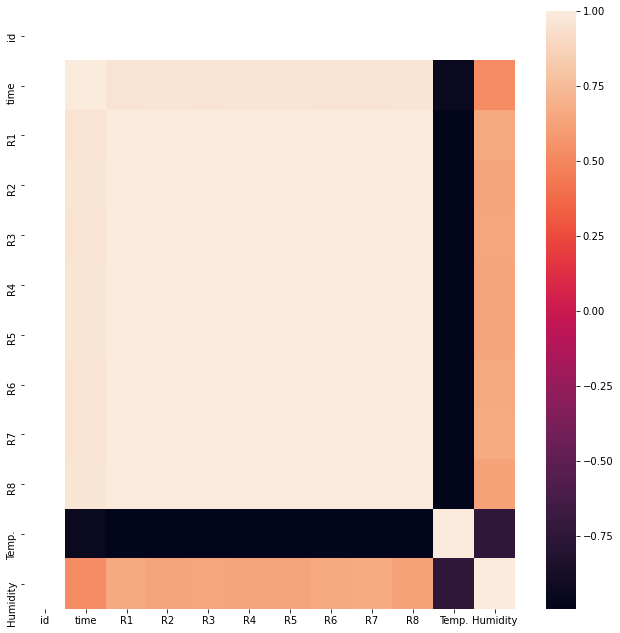

In [40]:
#finding correlation
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corrmat)

<AxesSubplot:xlabel='R1', ylabel='R2'>

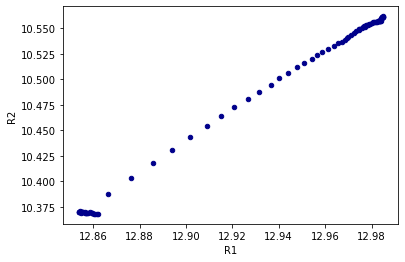

In [41]:
df.plot.scatter(x='R1', y='R2', c='DarkBlue')

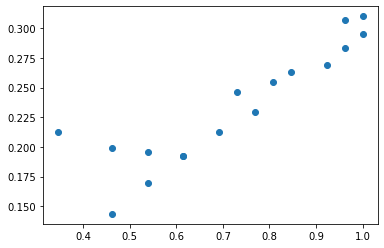

In [42]:
plt.scatter(y_split_test, yhat)